In [2]:
import numpy as np

In [16]:
nums = np.random.random(100)
nums

array([0.64561857, 0.43213306, 0.08695883, 0.58493719, 0.33427208,
       0.91222108, 0.09210183, 0.1329939 , 0.34651695, 0.68867651,
       0.5217619 , 0.15323093, 0.1612773 , 0.30397034, 0.9509243 ,
       0.87707696, 0.22295344, 0.60943845, 0.87771389, 0.88250797,
       0.72507556, 0.83083456, 0.97781621, 0.401684  , 0.87553179,
       0.67872476, 0.05159066, 0.72669617, 0.68220328, 0.06618159,
       0.11749547, 0.30924094, 0.98219477, 0.60424151, 0.09169691,
       0.3406372 , 0.6880309 , 0.83181344, 0.16449807, 0.94211776,
       0.44608537, 0.73452843, 0.31197781, 0.3474233 , 0.38324025,
       0.1747331 , 0.98081677, 0.69604332, 0.32201178, 0.21720501,
       0.71232217, 0.71299271, 0.19904856, 0.79873389, 0.74497002,
       0.63202972, 0.49680107, 0.01667722, 0.11639889, 0.49800391,
       0.34885757, 0.27608912, 0.80856511, 0.82737968, 0.38458198,
       0.84114871, 0.77900252, 0.90223331, 0.76236805, 0.7126907 ,
       0.9066638 , 0.17193656, 0.46030558, 0.66672482, 0.71432

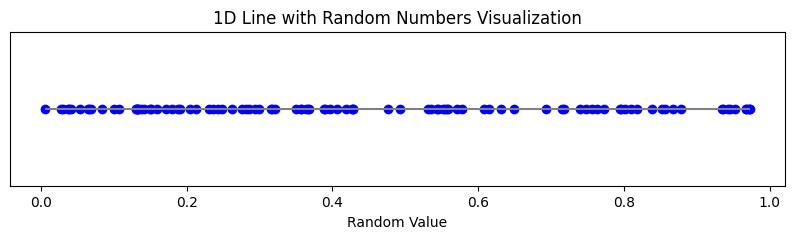

In [13]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num, max_num, colors='gray', linestyles='solid')  # 수평선 그리기

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b')  # 점들을 선 위에 표시

plt.title('1D Line with Random Numbers Visualization')
plt.xlabel('Random Value')
plt.yticks([])  # y축은 비우기 (1차원 느낌을 주기 위해)
plt.show()